In [1]:
from rmgpy.chemkin import load_chemkin_file
from rmgpy.tools.canteramodel import Cantera, get_rmg_species_from_user_species
from rmgpy.species import Species

In [2]:
species_list, reaction_list = load_chemkin_file('/home/calvin/code/RMG-Py/examples/rmg/superminimal/chemkin/chem_annotated.inp',
                                                '/home/calvin/code/RMG-Py/examples/rmg/superminimal/chemkin/species_dictionary.txt',
                                                '/home/calvin/code/RMG-Py/examples/rmg/superminimal/chemkin/tran.dat')

In [11]:
species_list

[Species(label="Ar", thermo=NASA(polynomials=[NASAPolynomial(coeffs=[2.5,0,0,0,0,-745.375,4.37967], Tmin=(200,'K'), Tmax=(1000,'K')), NASAPolynomial(coeffs=[2.5,0,0,0,0,-745.375,4.37967], Tmin=(1000,'K'), Tmax=(6000,'K'))], Tmin=(200,'K'), Tmax=(6000,'K'), comment="""Thermo library: primaryThermoLibrary"""), molecule=[Molecule(smiles="[Ar]")], transport_data=TransportData(shapeIndex=0, epsilon=(1134.93,'J/mol'), sigma=(3.33,'angstrom'), dipoleMoment=(0,'De'), polarizability=(0,'angstrom^3'), rotrelaxcollnum=0.0, comment="""GRI-Mech"""), reactive=False, molecular_weight=(39.8775,'amu')),
 Species(label="He", thermo=NASA(polynomials=[NASAPolynomial(coeffs=[2.5,0,0,0,0,-745.375,0.928724], Tmin=(200,'K'), Tmax=(1000,'K')), NASAPolynomial(coeffs=[2.5,0,0,0,0,-745.375,0.928724], Tmin=(1000,'K'), Tmax=(6000,'K'))], Tmin=(200,'K'), Tmax=(6000,'K'), comment="""Thermo library: primaryThermoLibrary"""), molecule=[Molecule(smiles="[He]")], transport_data=TransportData(shapeIndex=0, epsilon=(84.807

In [1]:
# Find the species: oxygen
from rmgpy.chemkin import load_chemkin_file
from rmgpy.tools.canteramodel import Cantera, get_rmg_species_from_user_species
from rmgpy.species import Species

species_list, reaction_list = load_chemkin_file(
    '/home/calvin/code/RMG-Py/examples/rmg/superminimal/chemkin/chem_annotated.inp',
    '/home/calvin/code/RMG-Py/examples/rmg/superminimal/chemkin/species_dictionary.txt',
    '/home/calvin/code/RMG-Py/examples/rmg/superminimal/chemkin/tran.dat',
)

user_oxygen   = Species().from_smiles('[O][O]')
user_hydrogen = Species().from_smiles('[H][H]')

# ONE call, both species:
species_dict = get_rmg_species_from_user_species(
    [user_oxygen, user_hydrogen],
    species_list,
)

oxygen   = species_dict[user_oxygen]
hydrogen = species_dict[user_hydrogen]

reactor_type_list = ['IdealGasReactor']
mol_frac_list=[{oxygen: 0.33, hydrogen: 0.67}]
Tlist = ([1000], 'K')
Plist = ([1], 'bar')
reaction_time_list = ([0.5], 'ms')

In [3]:
# Create cantera object, loading in the species and reactions
job = Cantera(species_list=species_list, reaction_list=reaction_list, output_directory='temp')
# The cantera file must be created from an associated chemkin file

# We can either load the Model from the initialized set of rmg species and reactions
job.load_model()

# Or load it from a chemkin file by uncommenting the following line:
#job.load_chemkin_model('/home/calvin/code/RMG-Py/examples/rmg/superminimal/chemkin/chem_annotated.inp',transport_file='/home/calvin/code/RMG-Py/examples/rmg/superminimal/chemkin/tran.dat')

# Generate the conditions based on the settings we declared earlier
job.generate_conditions(
    reactor_type_list=reactor_type_list,
    reaction_time_list=reaction_time_list,
    mol_frac_list=mol_frac_list,
    Tlist=Tlist,
    Plist=Plist,
)


In [4]:
import os, glob

print("Output directory:", job.output_directory)
print("PNG files:")
print(glob.glob(os.path.join(job.output_directory, "*.png")))


Output directory: temp
PNG files:
[]


Condition 1


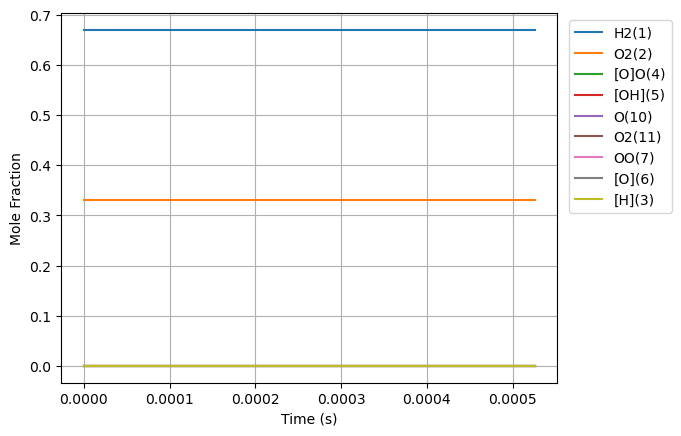

In [5]:
from IPython.display import display, Image
# Simulate and plot
alldata = job.simulate()
job.plot(alldata)

# Show the plots in the ipython notebook
for i, condition in enumerate(job.conditions):
    print('Condition {0}'.format(i+1))
    display(Image(filename="temp/{0}_mole_fractions.png".format(i+1)))



In [6]:
job.conditions

[CanteraCondition(reactor_type="IdealGasReactor", reaction_time=(0.5,'ms'), mol_frac={Species(index=2, label="O2", thermo=NASA(polynomials=[NASAPolynomial(coeffs=[3.53732,-0.00121572,5.3162e-06,-4.89446e-09,1.45846e-12,-1038.59,4.68368], Tmin=(100,'K'), Tmax=(1074.55,'K')), NASAPolynomial(coeffs=[3.15382,0.00167804,-7.69974e-07,1.51275e-10,-1.08782e-14,-1040.82,6.16756], Tmin=(1074.55,'K'), Tmax=(5000,'K'))], Tmin=(100,'K'), Tmax=(5000,'K'), comment="""Thermo library: primaryThermoLibrary"""), molecule=[Molecule(smiles="[O][O]")], transport_data=TransportData(shapeIndex=1, epsilon=(892.974,'J/mol'), sigma=(3.458,'angstrom'), dipoleMoment=(0,'De'), polarizability=(1.6,'angstrom^3'), rotrelaxcollnum=3.8, comment="""GRI-Mech"""), molecular_weight=(31.9988,'amu')): 0.33, Species(index=1, label="H2", thermo=NASA(polynomials=[NASAPolynomial(coeffs=[3.43536,0.000212712,-2.78629e-07,3.4027e-10,-7.76039e-14,-1031.36,-3.90842], Tmin=(100,'K'), Tmax=(1959.07,'K')), NASAPolynomial(coeffs=[2.78819,

In [24]:


# We can get the cantera model Solution's species and reactions
ct_species = job.model.species()
ct_reactions = job.model.reactions()

# We can view a cantera species or reaction object from this
ct_ethane = ct_species[4]
ct_rxn = ct_reactions[0]

print(ct_ethane)
print(ct_rxn)



<Species H2(1)>
2 [H](3) <=> H2(1)


In [25]:


# We can also do things like modifying the cantera species thermo and reaction kinetics through modifying the
# RMG objects first, then using the `modifyReactionKinetics` or `modifySpeciesThermo` functions

# Alter the RMG objects in place, lets pick ethane and the first reaction
rmg_oxygen = species_dict[user_oxygen]
rmg_oxygen.thermo.change_base_enthalpy(2*4184)  # Change base enthalpy by 2 kcal/mol

rmg_rxn = reaction_list[0]
rmg_rxn.kinetics.change_rate(4)  # Change A factor by multiplying by a factor of 4

# Take a look at the state of the cantera model before and after
print('Cantera Model: Before')
ct_species = job.model.species()
ct_reactions = job.model.reactions()
print('Oxygen Thermo = {} kcal/mol'.format(ct_species[4].thermo.h(300)/1000/4184))
print('Reaction 1 Kinetics = {}'.format(ct_reactions[0].rate))

# Now use the altered RMG objects to modify the kinetics and thermo
job.modify_reaction_kinetics(0, rmg_rxn)
job.modify_species_thermo(4, rmg_oxygen, use_chemkin_identifier = True)

# If we modify thermo, the cantera model must be refreshed.  If only kinetics are modified, this does not need to be done.
job.refresh_model()

print('')
print('Cantera Model: After')
ct_species = job.model.species()
ct_reactions = job.model.reactions()
print('Ethane Thermo = {} kcal/mol'.format(ct_species[4].thermo.h(300)/1000/4184))
print('Reaction 1 Kinetics = {}'.format(ct_reactions[0].rate))



Cantera Model: Before
Oxygen Thermo = 0.01384099714156864 kcal/mol
Reaction 1 Kinetics = <ArrheniusRate at 76dc3d8d35f0>

Cantera Model: After
Ethane Thermo = 2.0130026899962923 kcal/mol
Reaction 1 Kinetics = <ArrheniusRate at 76dc3d8ca2b0>
